In [1]:
import numpy as np
import math
pi = np.pi

from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector

sim = Aer.get_backend("aer_simulator")

token = "6495fdfafb29e4c0e8776cf0336a604a47139dfed0098ff67b0c175f1fea925d6fb616ae7f6b2c482b0b864dbdcce38823c45ab49d364539194a901f8a503acd"
IBMQ.save_account(token, overwrite=True)
provider = IBMQ.load_account()

In [2]:
def qft_rotations(circ, n):
    for i in reversed(range(n)):
        circ.h(i)
        for j in range(i):
            circ.cp(pi / 2 ** (i - j), j, i)

In [3]:
def iqft_rotations(circ, n):
    for i in range(n):
        for j in reversed(range(i)):
            circ.cp(-pi / 2 ** (i - j), j, i)
        circ.h(i)

In [4]:
def swap_registers(circ, n):
    for i in range(n // 2):
        circ.swap(i, n - i - 1)

In [5]:
def qft(circ, n):
    qft_rotations(circ, n)
    swap_registers(circ, n)

In [6]:
def iqft(circ, n):
    swap_registers(circ, n)
    iqft_rotations(circ, n)

# A. Quantum Fourier Transform (QFT)

## i. $j = \left|1001\right\rangle$

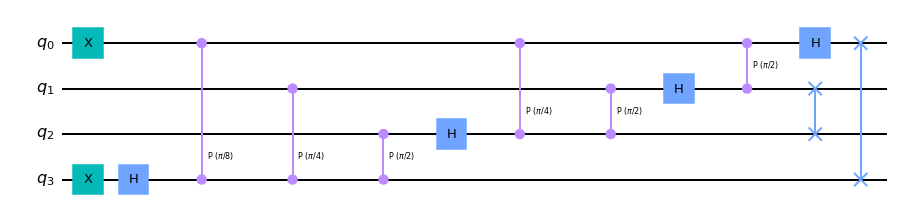

In [7]:
qc = QuantumCircuit(4)

qc.x(0)
qc.x(3)

qft(qc, 4)
qc.draw(output='mpl')

/home/xuan/.local/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


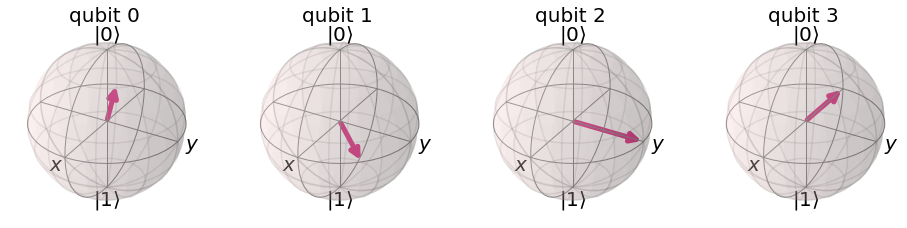

In [8]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

## ii. $j = \left|101\right\rangle$

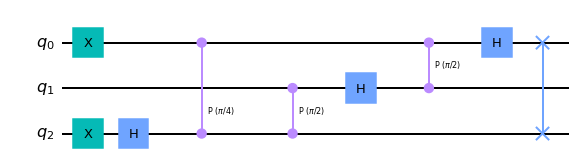

In [9]:
qc = QuantumCircuit(3)

qc.x(0)
qc.x(2)

qft(qc, 3)
qc.draw(output='mpl')

/home/xuan/.local/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


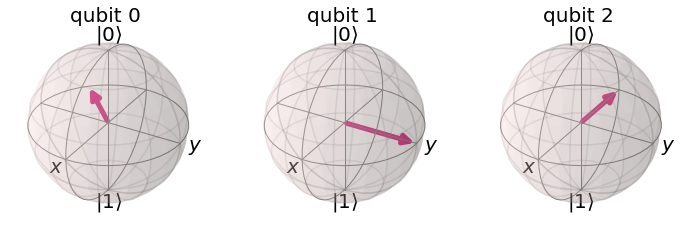

In [10]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

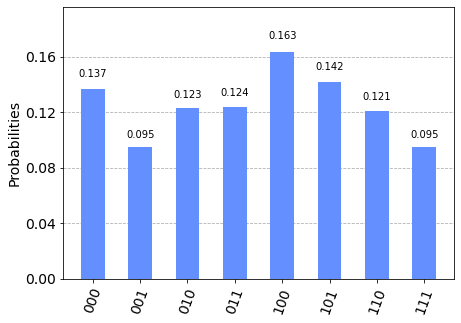

In [11]:
qc = QuantumCircuit(3, 3)

qc.x(0)
qc.x(2)

qft(qc, 3)

for i in range(3):
    qc.measure(i, i)

job    = execute(qc, provider.get_backend('ibmq_bogota'), shots = 1000)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

# B. Inverse QFT

## i. $\left|5\right\rangle$

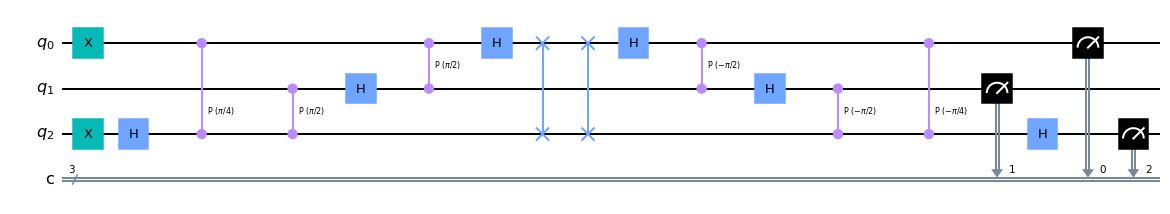

In [12]:
qc = QuantumCircuit(3, 3)

qc.x(0)
qc.x(2)

qft(qc, 3)
iqft(qc, 3)

for i in range(3):
    qc.measure(i, i)

qc.draw(output='mpl')

/home/xuan/.local/lib/python3.9/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


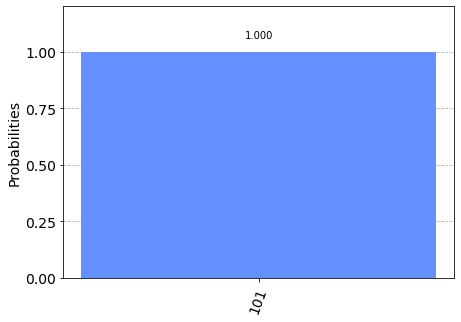

In [13]:
t_qc = transpile(qc, sim)
qobj = assemble(t_qc, shots = 1000)
counts = sim.run(qobj).result().get_counts()

plot_histogram(counts)

## ii. superposition state

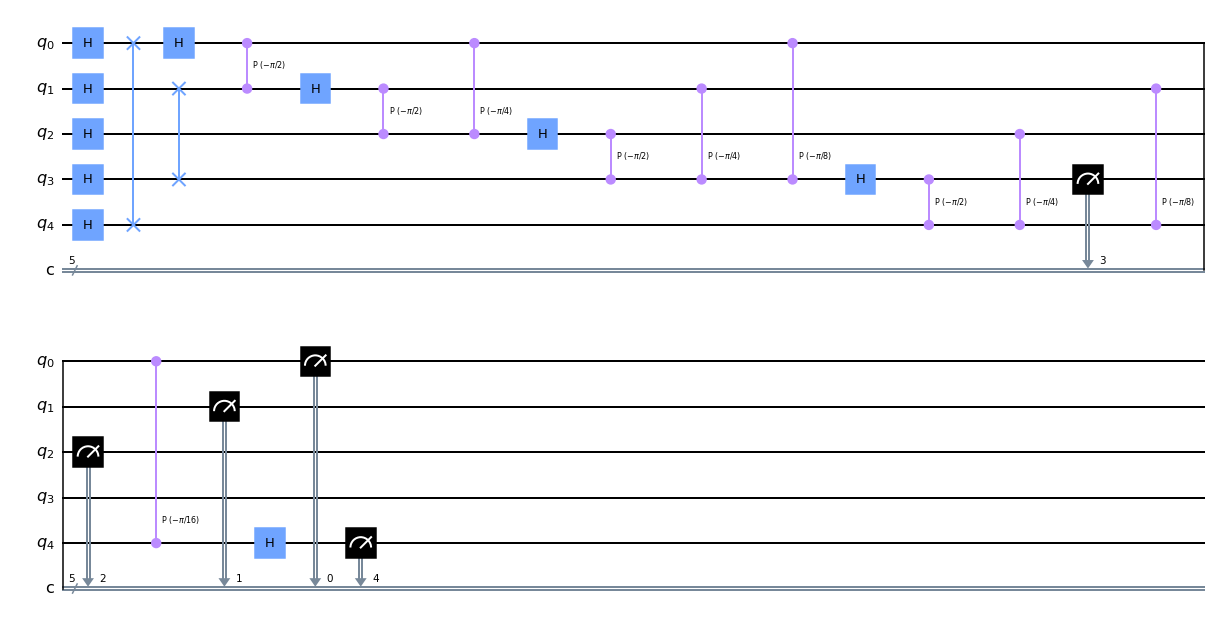

In [14]:
qc = QuantumCircuit(5, 5)

for i in range(5):
    qc.h(i)
    
iqft(qc, 5)

for i in range(5):
    qc.measure(i, i)

qc.draw(output='mpl')

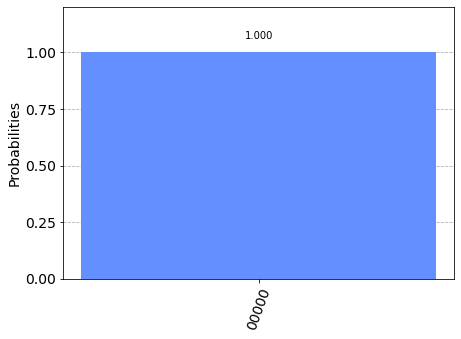

In [15]:
t_qc = transpile(qc, sim)
qobj = assemble(t_qc, shots = 1000)
counts = sim.run(qobj).result().get_counts()


plot_histogram(counts)

# C. Quantum Phase Estimate (QPE)

In [16]:
def qpe_phase_2pi_3(n):
    qc = QuantumCircuit(n + 1, n)

    for i in range(n):
        qc.h(i)
    qc.x(n)

    repetitions = 1
    for counting_qubit in range(n):
        qc.cp(pi * .666666666666666 * repetitions, counting_qubit, n)
        repetitions *= 2
    
    iqft(qc, n)

    for i in range(n):
        qc.measure(i, i)
    
    return qc

## i. P-gate with $\phi = \frac{2\pi}{3}$ using 3 qubits.

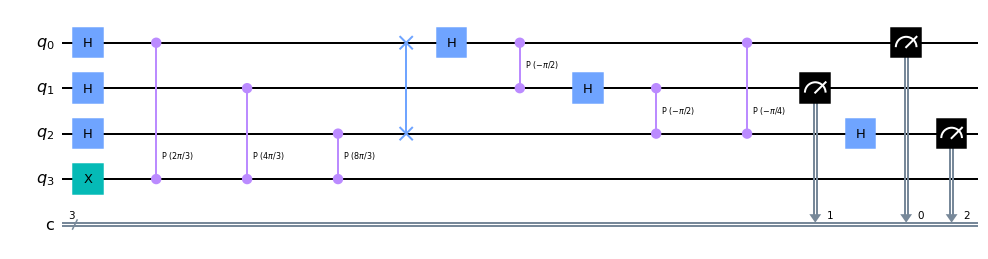

In [17]:
qc = qpe_phase_2pi_3(3)
qc.draw(output='mpl')

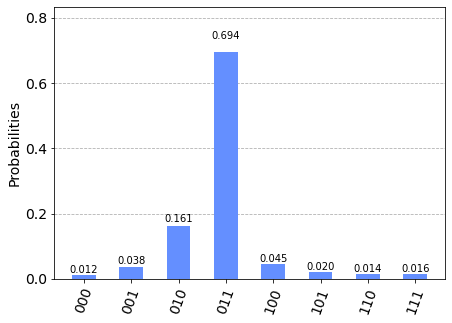

In [18]:
t_qc = transpile(qc, sim)
qobj = assemble(t_qc, shots = 1000)
counts = sim.run(qobj).result().get_counts()

plot_histogram(counts)

## ii. P-gate with $\phi = \frac{2\pi}{3}$ using 5 qubits.

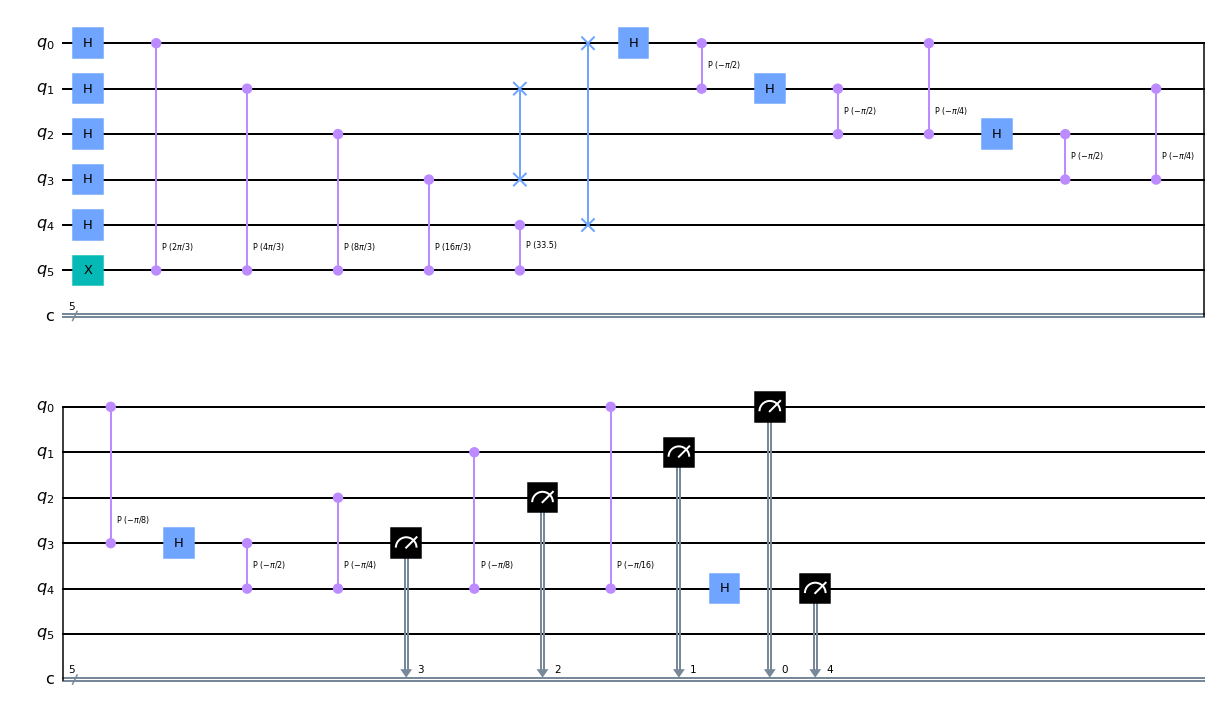

In [19]:
qc = qpe_phase_2pi_3(5)
qc.draw(output='mpl')

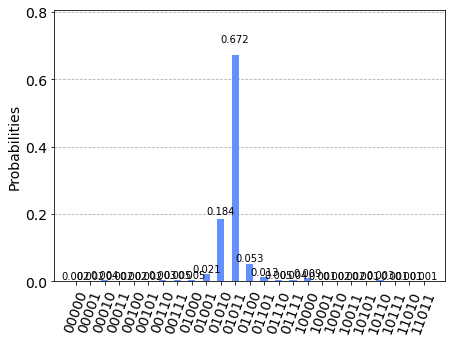

In [20]:
t_qc = transpile(qc, sim)
qobj = assemble(t_qc, shots = 1000)
counts = sim.run(qobj).result().get_counts()

plot_histogram(counts)

## iii. P-gate with $\phi = \frac{2\pi}{3}$ using 7 qubits.

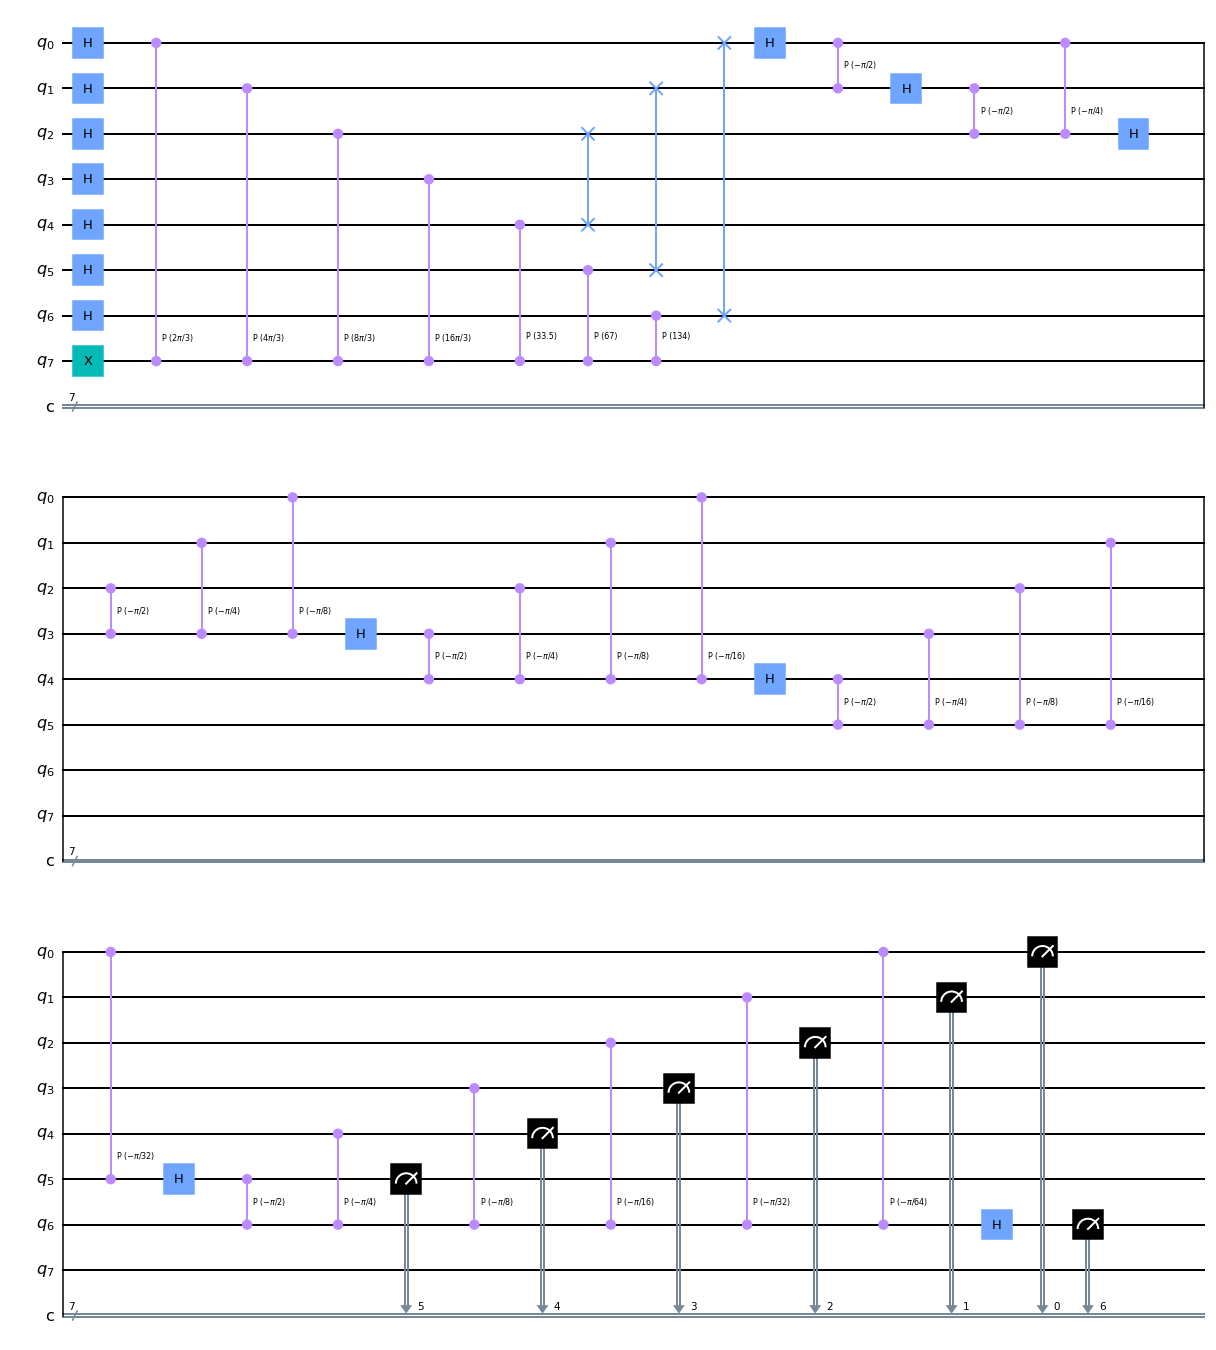

In [21]:
qc = qpe_phase_2pi_3(7)
qc.draw(output='mpl')

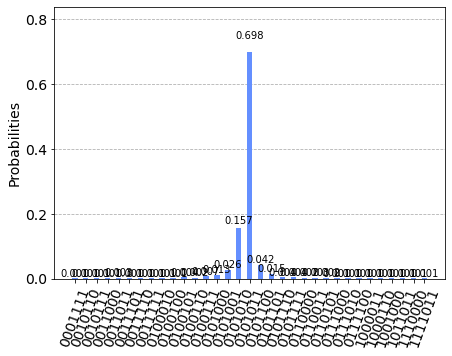

In [22]:
t_qc = transpile(qc, sim)
qobj = assemble(t_qc, shots = 1000)
counts = sim.run(qobj).result().get_counts()

plot_histogram(counts)

## iv. H-gate.

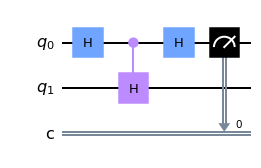

In [23]:
n = 1

qc = QuantumCircuit(n + 1, n)

for i in range(n):
    qc.h(i)

repetitions = 1
for counting_qubit in range(n):
    for _ in range(repetitions):
        qc.ch(counting_qubit, n)
    repetitions *= 2
    
iqft(qc, n)

for i in range(n):
    qc.measure(i, i)

qc.draw(output='mpl')

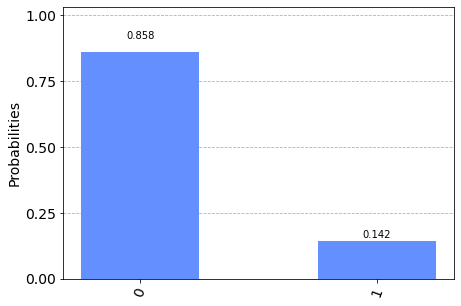

In [24]:
t_qc = transpile(qc, sim)
qobj = assemble(t_qc, shots = 1000)
counts = sim.run(qobj).result().get_counts()

plot_histogram(counts)